## Naive Bayes - Record Data

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Loading Merged Data
nb_merged = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/merged.csv")

# Define the target based on specified criteria
criteria = (nb_merged['Marine Protected Area (sqkm)'] > 1800) & \
           (nb_merged['Aqua Production (Millions)'] > 105588) & \
           (nb_merged['Fishing Exports (Millions)'] > 2400) & \
           (nb_merged['Inventions (number)'] >= 70) & \
           (nb_merged['Instruments (number)'] >= 100)

# Create the "Innovative" target variable. Innovative is 0, Non innovative is 1
nb_merged['Innovative'] = criteria.astype(int)

# Convert all numeric columns to integers
numeric_cols = nb_merged.select_dtypes(include=['number'])
nb_merged[numeric_cols.columns] = numeric_cols.astype(int)

# Encode the "Country" column using LabelEncoder
label_encoder = LabelEncoder()
nb_merged['Country'] = label_encoder.fit_transform(nb_merged['Country'])

# Split the data into features (X) and the target (y)
X = nb_merged.drop('Innovative', axis=1)
y = nb_merged['Innovative']

# Split the data into training and the remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

gnb.fit(X_train, y_train)

# Make predictions on the testing set
y_test_pred = gnb.predict(X_test)

# Make predictions on the validation set
y_val_pred = gnb.predict(X_val)

# Evaluate the model's performance on the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", accuracy_test)

# Generate a classification report for more detailed performance metrics on the testing set
classification_report_test = classification_report(y_test, y_test_pred)
print("Testing Classification Report:\n", classification_report_test)

# Evaluate the model's performance on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

# Generate a classification report for more detailed performance metrics on the validation set
classification_report_val = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", classification_report_val)


Testing Accuracy: 1.0
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       129

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129

Validation Accuracy: 1.0
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       129

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129



## Confusion Matrix

A table with two rows and two columns that reports the number of true positives, false negatives, false positives, and true negatives.

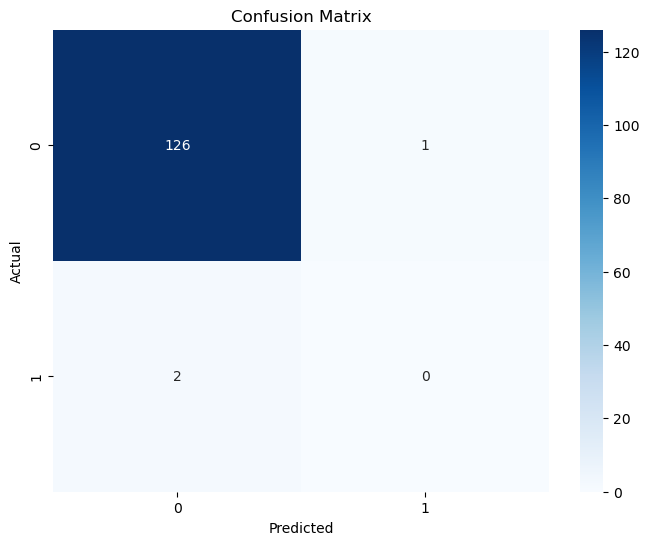

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_pred, y_val_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## ROC Curve 

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


IndexError: index 1 is out of bounds for axis 1 with size 1